In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
import time


#needed to import utils.py
sys.path.append('../') 

import utils
import utils_preprocessing
import utils_exec_models

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm, ListedColormap

import seaborn as sns
try:
    plt.style.use('seaborn-v0_8-whitegrid')
except:
    plt.style.use('seaborn-whitegrid')


from IPython.core.display import HTML

from IPython.display import clear_output


# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)


%matplotlib inline  



# Read the results files

In [36]:
path = os.path.abspath('exec_results')

df_all_models = utils.read_csv(csv_file=f'{path}/best_results.csv')

cols_of_interest = [
    'Algorithm',
    'Scenario',
    'balanced_accuracy',
    'sensitivity',
    'specificity',
#     'AUC',
]

df_all_models.sort_values(by=['Algorithm', 'Scenario'], ascending=[True, True], inplace=True)    

display(df_all_models)



,Algorithm,Scenario,Features,Model,balanced_accuracy,sensitivity,specificity,f1_score,AUC,accuracy,...,Estimator_Class,Estimator_Hyperparams,fit_time,train_balanced_accuracy,train_sensitivity,train_specificity,train_f1_score,train_AUC,train_accuracy,train_precision
0,Decision Tree,Ensemble-Imbalance,All Features,Balanced Bagging,0.88,0.96,0.81,0.57,0.94,0.82,...,DecisionTreeClassifier,"{'ccp_alpha':0.0,'class_weight':'balanced','cr...",0.01,0.78,0.71,0.84,0.52,0.88,0.83,0.41
9,Decision Tree,Single-Model,All Features,Decision Tree,0.83,0.85,0.81,0.53,0.88,0.82,...,NaN,NaN,0.01,0.76,0.75,0.77,0.46,0.84,0.77,0.33
8,Naïve Bayes,Ensemble-Imbalance,All Features,Balanced Bagging,0.84,0.85,0.83,0.54,0.90,0.83,...,GaussianNB,"{'priors':None,'var_smoothing':1e-09}",0.02,0.80,0.75,0.85,0.54,0.88,0.84,0.43
10,Naïve Bayes,Single-Model,All Features,Naïve Bayes,0.80,0.74,0.86,0.53,0.90,0.84,...,NaN,NaN,0.01,0.78,0.68,0.89,0.56,0.88,0.86,0.47
1,Neural Networks,Ensemble-Imbalance,All Features,Balanced Bagging,0.88,0.96,0.80,0.56,0.93,0.82,...,MLPClassifier,"{'activation':'tanh','alpha':0.1,'batch_size':...",0.03,0.82,0.81,0.83,0.55,0.91,0.83,0.42
6,Neural Networks,Single-Model,All Features,Neural Networks,0.87,0.87,0.87,0.61,0.94,0.87,...,NaN,NaN,0.01,0.50,0.27,0.73,0.06,0.64,0.67,0.03
2,Random Forest,Ensemble-Imbalance,All Features,Balanced Random Forest,0.87,0.96,0.79,0.55,0.93,0.81,...,RandomForest,NaN,0.01,0.81,0.80,0.82,0.53,0.89,0.82,0.40
5,Random Forest,Single-Model,All Features,Random Forest,0.87,0.89,0.86,0.60,0.92,0.86,...,NaN,NaN,0.01,0.80,0.72,0.88,0.56,0.90,0.86,0.47
3,SVM,Ensemble-Imbalance,All Features,Balanced Bagging,0.87,0.94,0.81,0.56,0.93,0.82,...,SVC,"{'C':3,'break_ties':False,'cache_size':200,'cl...",0.32,0.83,0.81,0.85,0.57,0.91,0.84,0.44
4,SVM,Single-Model,All Features,SVM,0.87,0.94,0.80,0.54,0.93,0.81,...,NaN,NaN,0.03,0.82,0.80,0.84,0.56,0.90,0.84,0.43


# Print performances in Latex table format

In [37]:
cols_latex = cols_of_interest

print(df_all_models[cols_latex].to_latex(
    index=False,
#         formatters={"name": str.upper},
    float_format="{:.2f}".format,
))  


\begin{tabular}{llrrr}
\toprule
Algorithm & Scenario & balanced_accuracy & sensitivity & specificity \\
\midrule
Decision Tree & Ensemble-Imbalance & 0.88 & 0.96 & 0.81 \\
Decision Tree & Single-Model & 0.83 & 0.85 & 0.81 \\
Naïve Bayes & Ensemble-Imbalance & 0.84 & 0.85 & 0.83 \\
Naïve Bayes & Single-Model & 0.80 & 0.74 & 0.86 \\
Neural Networks & Ensemble-Imbalance & 0.88 & 0.96 & 0.80 \\
Neural Networks & Single-Model & 0.87 & 0.87 & 0.87 \\
Random Forest & Ensemble-Imbalance & 0.87 & 0.96 & 0.79 \\
Random Forest & Single-Model & 0.87 & 0.89 & 0.86 \\
SVM & Ensemble-Imbalance & 0.87 & 0.94 & 0.81 \\
SVM & Single-Model & 0.87 & 0.94 & 0.80 \\
k-NN & Ensemble-Imbalance & 0.85 & 0.85 & 0.85 \\
k-NN & Single-Model & 0.68 & 0.40 & 0.96 \\
\bottomrule
\end{tabular}



# Plot a bar graph comparing the performances

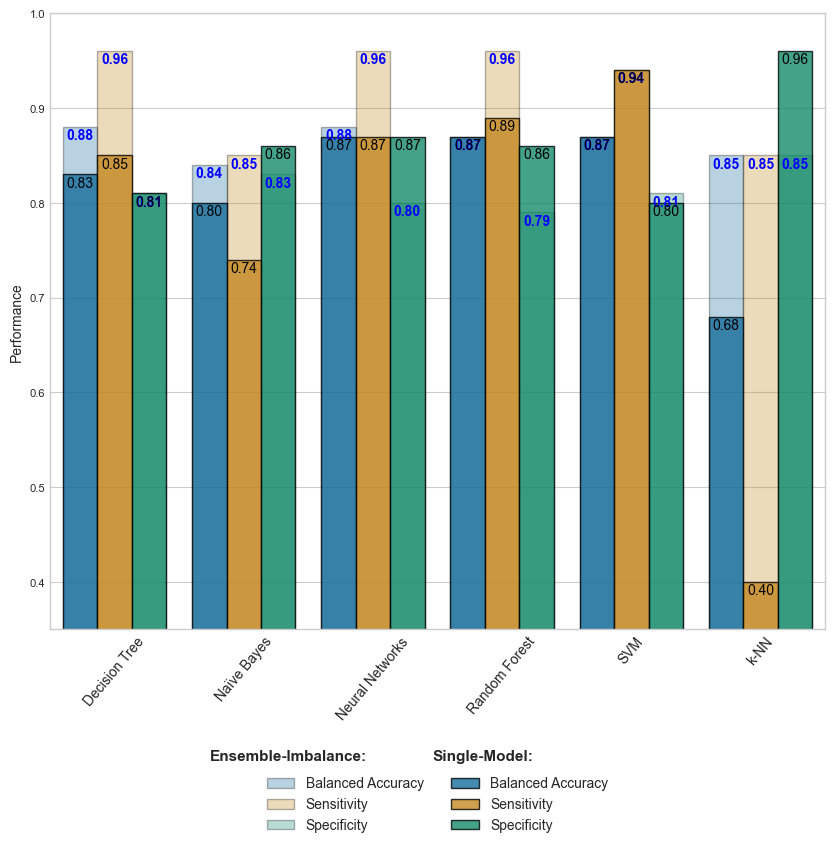

In [9]:
cols_to_plot = [
    'Algorithm',
    'Scenario',
    'balanced_accuracy',
    'sensitivity',
    'specificity',
#     'AUC',
]

data_aux = df_all_models[cols_to_plot].copy()

scenarios = ['Ensemble-Imbalance', 'Single-Model']

i = 0

df_plot = None

plt.figure(figsize=[10,8])

# for scenario, metric, desc in zip(scenarios, metrics, descs):
for scenario in scenarios:
    i += 1

    data = data_aux.loc[(data_aux.Scenario == scenario)].copy()
    
    data = data.melt(
        id_vars=['Scenario', 'Algorithm'], 
        var_name='Metric', 
        value_name='Value'
    )
    
    data.Metric.replace('balanced_accuracy', 'Balanced Accuracy', inplace=True)
    data.Metric.replace('sensitivity', 'Sensitivity', inplace=True)
    data.Metric.replace('specificity', 'Specificity', inplace=True)

    if df_plot is None:
        df_plot = data.copy()
    else:
        df_plot = pd.concat([df_plot, data.copy()], ignore_index=True)
    
#     display(data)
    
    if scenario == 'Ensemble-Imbalance':
        palette = 'colorblind'
        color = None
        fill = False
        edgecolor='black', 
        linewidth=2,
        alpha = 0.3
    else:
        palette = 'colorblind'
        color = None
        fill = True
        edgecolor='black', 
        linewidth=1,
        alpha = 0.8
    
    
    g = sns.barplot(
        data=data, 
        x='Algorithm', 
        y='Value', 
        hue='Metric',
        palette=palette,
        edgecolor=edgecolor, 
        alpha=alpha,
    )            
   
    

midline_decimal_point = False

# annotate the bars with their values
for idx_p, p in enumerate(g.axes.patches):
    
    
    font_bold = False
    font_size = 10
    mark = ''
    offset_aux = 0
    offset_mark = 0.015
    ypos_offset = 0.009

    
    
    if idx_p <= 17: #'Ensemble-Imbalance':
        mark_aux = '' #'$\star$'
        max_bacc = 0.88
        max_sens = 0.94
        max_spec = 0.83
        offset = offset_aux
        annot_ypos_offset = (-1) * ypos_offset
        hatch = ''
        
    else: #'Single-Model':
        mark_aux = '' #'$\diamond$'
        max_bacc = 0.85
        max_sens = 0.91
        max_spec = 0.95
        offset   = offset_aux
        annot_ypos_offset = (-1) * ypos_offset
        hatch = '.'


    # REPLACE "DECIMAL POINT" TO "MIDLINE DECIMAL POINT"
    val = f'{mark}{p.get_height():.2f}'
    if midline_decimal_point:
        val = val.replace('.', '·')
    
    
    g.annotate(
        val,
        xy=(
            (p.get_x()+p.get_width()/2) - offset,
            p.get_height() + annot_ypos_offset
        ),
        ha="center", 
        va="center",
        size=font_size,
        color=('blue' if (idx_p <= 17) else 'black'),
        weight=('bold' if (idx_p <= 17) else 'normal'),
    )    


sns.move_legend(g.axes, "lower center", bbox_to_anchor=(0.5, -0.35), ncol=2)
g.legend_.set_title(None)


plt.ylim(0.35, 1.0)
plt.xticks(rotation=50)
plt.yticks(fontsize=8)

plt.xlabel('')
plt.ylabel('Performance')
    
    
g.annotate(
    'Ensemble-Imbalance:', xy=(151, 63), xycoords='figure points', size=11, weight='bold'
)    
g.annotate(
    'Single-Model:', xy=(311, 63), xycoords='figure points', size=11, weight='bold'
)    


# save the graph
utils.save_plot(
    plt=plt, 
    folder=f'{path}/saved_graphs', 
    file_name='performances_both_scenarios', 
    save_in_pdf_format=True,
)


plt.show()



<Figure size 1500x1500 with 0 Axes>

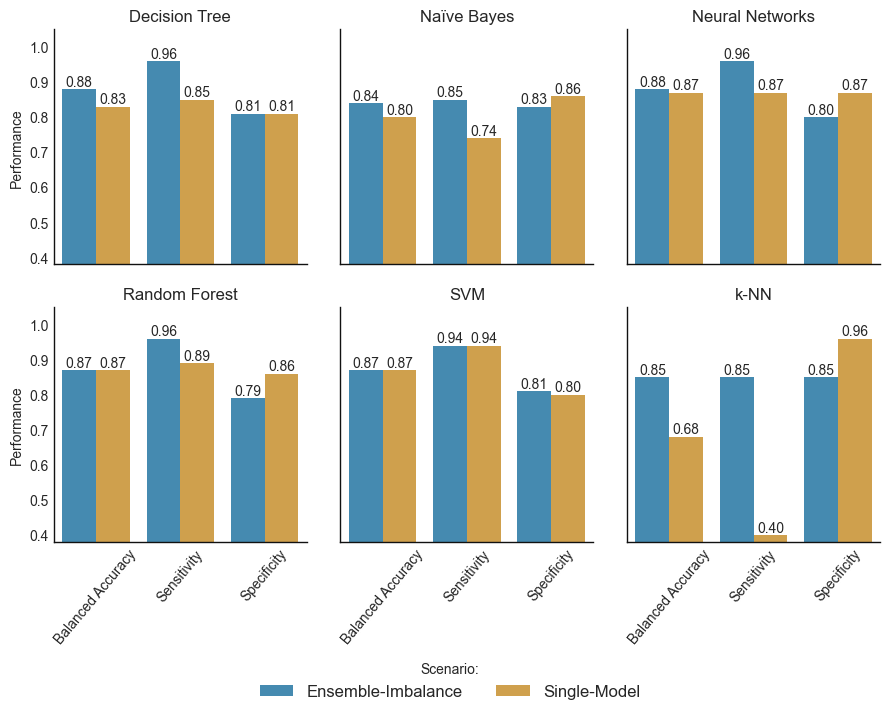

In [25]:
def plot_models_comparison(df, graph_title='Performances Comparison', show_lineplot=True, figsize=[6,2]):    

    
    plt.figure(figsize=figsize)

    g = sns.FacetGrid(
        df, 
        col="Algorithm",
        col_wrap=3,
        sharex=True,
        sharey=True,
    )
    g.map_dataframe(
        sns.barplot,
        x='Metric', 
        y='Performance', 
        hue='Scenario',
        alpha=0.8,
        palette=sns.color_palette("colorblind"),
    )    
    

#     for ax in g.axes.ravel():
#         for p in ax.patches:
#             print(p)
#             ax.annotate(
#                 format(p.get_height(), '.2f'), 
#                 (p.get_x() + p.get_width() / 2., 
#                 p.get_height()), 
#                 ha = 'center', 
#                 va = 'center', 
#                 xytext = (0, 6), 
#                 textcoords = 'offset points',
# #                 fontweight='bold',
                
#             )
    

    for ax in g.axes.flat:
        plt.setp(ax.get_xticklabels(), rotation=50) 
        ax.set_xlabel('')
        ax.grid(False)
        ax.spines['left'].set_color('#111111')
        ax.spines['bottom'].set_color('#111111')
        ax.set_title(ax.get_title().replace('Algorithm = ', '').strip())

        # add the annotation
        for container in ax.containers:
            ax.bar_label(
                container, 
                fmt='%.2f',
                label_type='edge', 
#                 fontsize=10,
            )
            
           
    plt.legend(
        title='Scenario:',
        bbox_to_anchor=(-0.7, -0.7), 
        loc='lower center',
        ncols=2,
        fontsize=12,
        borderaxespad=0,
        
    )
    

    plt.ylim(0.38, 1.05)

    # save the graph
    utils.save_plot(
        plt=plt, 
        folder=f'{path}/saved_graphs', 
        file_name='performances_both_scenarios_barplot', 
        save_in_pdf_format=True,
    )
    
    
    plt.show()        

#

df_plot.rename(columns={'Value': 'Performance'}, inplace=True)

# display(df_plot)

plot_models_comparison(df=df_plot, figsize=[15,15])

In [35]:
container.get_label()
# print(help(container))


Help on BarContainer in module matplotlib.container object:

class BarContainer(Container)
 |  BarContainer(patches, errorbar=None, *, datavalues=None, orientation=None, **kwargs)
 |  
 |  Container for the artists of bar plots (e.g. created by `.Axes.bar`).
 |  
 |  The container can be treated as a tuple of the *patches* themselves.
 |  Additionally, you can access these and further parameters by the
 |  attributes.
 |  
 |  Attributes
 |  ----------
 |  patches : list of :class:`~matplotlib.patches.Rectangle`
 |      The artists of the bars.
 |  
 |  errorbar : None or :class:`~matplotlib.container.ErrorbarContainer`
 |      A container for the error bar artists if error bars are present.
 |      *None* otherwise.
 |  
 |  datavalues : None or array-like
 |      The underlying data values corresponding to the bars.
 |  
 |  orientation : {'vertical', 'horizontal'}, default: None
 |      If 'vertical', the bars are assumed to be vertical.
 |      If 'horizontal', the bars are assumed

In [117]:
df_plot

,Scenario,Algorithm,Metric,Performance
0,Ensemble-Imbalance,Decision Tree,Balanced Accuracy,0.88
1,Ensemble-Imbalance,Naïve Bayes,Balanced Accuracy,0.84
2,Ensemble-Imbalance,Neural Networks,Balanced Accuracy,0.88
3,Ensemble-Imbalance,Random Forest,Balanced Accuracy,0.87
4,Ensemble-Imbalance,SVM,Balanced Accuracy,0.87
5,Ensemble-Imbalance,k-NN,Balanced Accuracy,0.85
6,Ensemble-Imbalance,Decision Tree,Sensitivity,0.96
7,Ensemble-Imbalance,Naïve Bayes,Sensitivity,0.85
8,Ensemble-Imbalance,Neural Networks,Sensitivity,0.96
9,Ensemble-Imbalance,Random Forest,Sensitivity,0.96


---
---
---

# OTHERS